In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import export_text

In [2]:
#Load iris dataset
iris=load_iris()
X=iris.data[:,:2] # we only take the firs two features.
y=iris.target

In [3]:
#Split data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
#Train a decisionTree classifier
clf=DecisionTreeClassifier(max_depth=3,min_samples_split=40)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=40)

In [14]:
#check accuracy
y_pred=clf.predict(X_test)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")

Accuracy:0.8


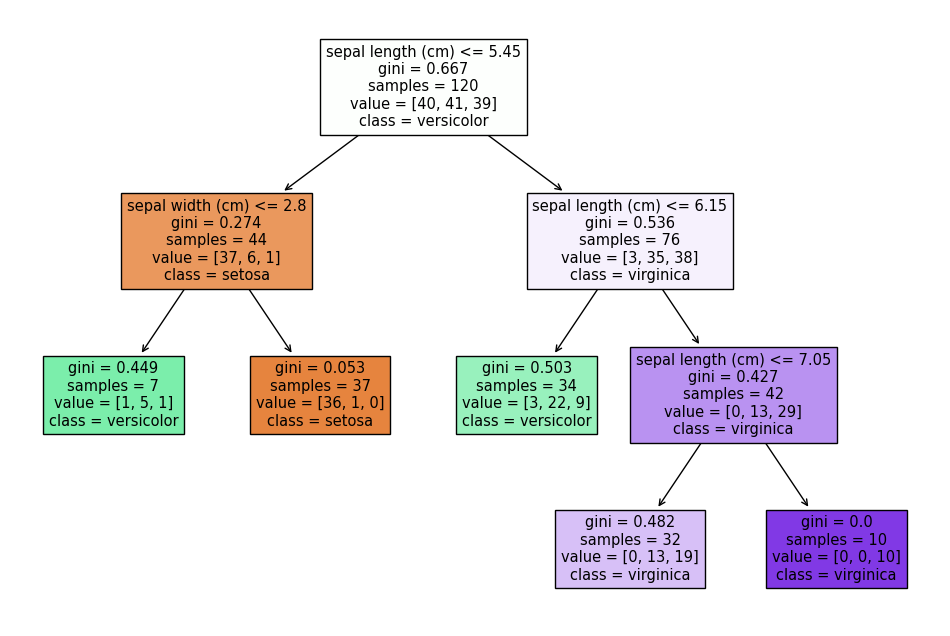

In [15]:
#Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(clf,filled=True,feature_names=iris.feature_names[:2],class_names=iris.target_names)
plt.show()

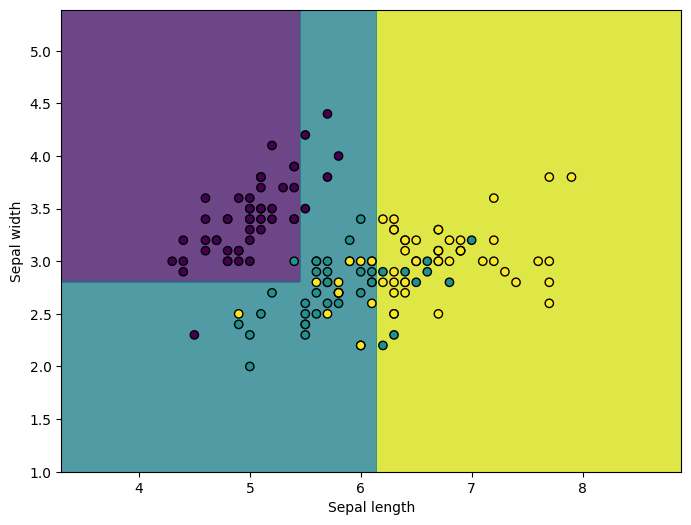

In [22]:
#plot the decision tree
plt.figure(figsize=(8,6))
x_min,x_max=X[:,0].min() - 1, X[:,0].max() + 1
y_min,y_max=X[:,1].min() - 1,X[:,1].max() + 1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),
                  np.arange(y_min,y_max,0.01))
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,alpha=0.8)
plt.scatter(X[:,0],X[:,1],c=y,edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()



In [23]:
r=export_text(clf,feature_names=['sepal_length','sepal_width'])
print(r)

|--- sepal_length <= 5.45
|   |--- sepal_width <= 2.80
|   |   |--- class: 1
|   |--- sepal_width >  2.80
|   |   |--- class: 0
|--- sepal_length >  5.45
|   |--- sepal_length <= 6.15
|   |   |--- class: 1
|   |--- sepal_length >  6.15
|   |   |--- sepal_length <= 7.05
|   |   |   |--- class: 2
|   |   |--- sepal_length >  7.05
|   |   |   |--- class: 2

